In [3]:
# Import libraries and define paths
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Dataset and metadata file paths
dataset_path = '/home/bodhdipta/Documents/Ekush/dataset'
meta_file = '/home/bodhdipta/Documents/Ekush/metaData_img.csv'

# Load metadata mapping folder numbers to Bengali characters
meta_df = pd.read_csv(meta_file)
label_map = dict(zip(meta_df['Folder Name'], meta_df['Char Name']))

# Define image dimensions and batch size
img_height, img_width = 32, 32
batch_size = 32

In [4]:
# Create training and validation datasets (80/20 split)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

# Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Found 367018 files belonging to 122 classes.
Using 293615 files for training.
Found 367018 files belonging to 122 classes.
Using 73403 files for validation.


In [5]:
# Build the CNN model
num_classes = len(os.listdir(dataset_path))
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/home/bodhdipta/linuxtoolbox/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 122)            │        15,738 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,650 (682.23 KB)

 Trainable params: 174,650 (682.23 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model for 10 epochs
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 135s 15ms/step - accuracy: 0.6301 - loss: 1.5018 - val_accuracy: 0.8679 - val_loss: 0.4901
Epoch 2/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 138s 15ms/step - accuracy: 0.8726 - loss: 0.4669 - val_accuracy: 0.8814 - val_loss: 0.4326
Epoch 3/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 142s 16ms/step - accuracy: 0.8992 - loss: 0.3681 - val_accuracy: 0.8969 - val_loss: 0.3848
Epoch 4/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9123 - loss: 0.3160 - val_accuracy: 0.8984 - val_loss: 0.3845
Epoch 5/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9211 - loss: 0.2840 - val_accuracy: 0.8960 - val_loss: 0.3962
Epoch 6/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 141s 15ms/step - accuracy: 0.9265 - loss: 0.2625 - val_accuracy: 0.9017 - val_loss: 0.3837
Epoch 7/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 140s 15ms/step - accuracy: 0.9305 - loss: 0.2448 - val_accuracy: 0.8974 - val_loss: 0.4164
Epoch 8/10
9176/9176 ━━━━━━━━━━━━━━━━━━━━ 139s 15ms/step - accuracy: 

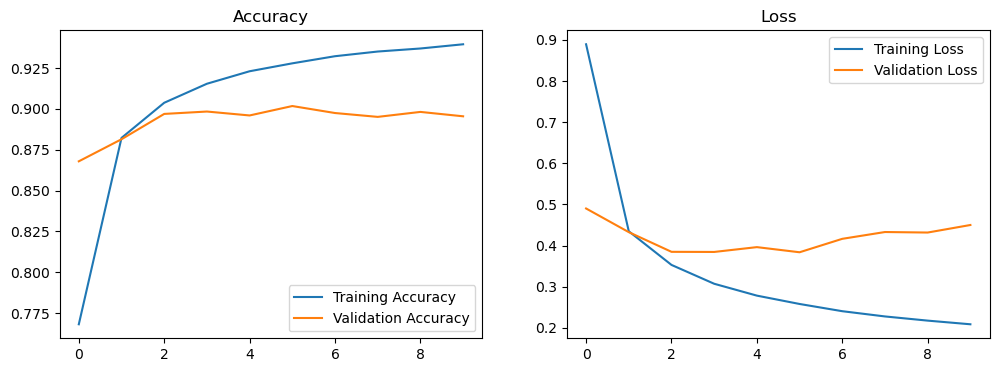

In [7]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
# ...existing code if any...

In [ ]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Define dataset path (assumes folders 0-121 are inside this directory)
dataset_path = '/home/bodhdipta/Documents/Ekush/dataset'

# Load metadata mapping folder numbers to Bengali characters
meta_df = pd.read_csv('/home/bodhdipta/Documents/Ekush/metaData_img.csv')
label_map = dict(zip(meta_df['Folder Name'], meta_df['Char Name']))  # use if needed for interpretation

# Define image dimensions and batch size
img_height, img_width = 64, 64
batch_size = 32

# Create training and validation datasets using an 80-20 split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

# Improve performance with prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Build a simple CNN model
num_classes = len(os.listdir(dataset_path))
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model for 10 epochs
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
# ...existing code if any...